In [1]:
import pandas as pd # load pandas library
import json # import the json library
import requests # to get data via api
import numpy as np # import numpy library

First I will get the symbol for companies I'm going to work on. For this csv file is used where company name, sector and company's ticker symbol is given.

In [8]:
# read contents of a csv file from GitHub into a Pandas DataFrame
df = pd.read_csv('https://raw.githubusercontent.com/getfitwithapurv/example/main/constituents_csv.csv?token=ATYYZBOACLUU26QV4BQVSATBYDAAY')
df

,Symbol,Name,Sector
0,MMM,3M,Industrials
1,AOS,A. O. Smith,Industrials
2,ABT,Abbott Laboratories,Health Care
3,ABBV,AbbVie,Health Care
4,ABMD,Abiomed,Health Care
...,...,...,...
500,YUM,Yum! Brands,Consumer Discretionary
501,ZBRA,Zebra Technologies,Information Technology
502,ZBH,Zimmer Biomet,Health Care
503,ZION,Zions Bancorp,Financials


In [17]:
df[(df['Name']=='Amazon')| (df['Name']=='Apple')|(df['Name']=='Alphabet (Class C)')|(df['Name']=='Facebook')|(df['Name']=='Microsoft')]
#Using condition to get ticker symbol for required five companies.

,Symbol,Name,Sector
24,GOOG,Alphabet (Class C),Communication Services
26,AMZN,Amazon,Consumer Discretionary
45,AAPL,Apple,Information Technology
189,FB,Facebook,Communication Services
314,MSFT,Microsoft,Information Technology


Now I want stock data for these five companies. Using API and putting ticker symbol we will get data in json format.
API key : F2MED2PM07CN4D7U

In [31]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AAPL&outputsize=full&apikey=F2MED2PM07CN4D7U'
r = requests.get(url) # use requests.get to access the content 
apple = r.json() # reading it in json format
apple = pd.DataFrame(apple)# converting to dataframe
apple # sanity check how the data looks like and what data is useful for us from it.

,Meta Data,Time Series (Daily)
1. Information,Daily Time Series with Splits and Dividend Events,NaN
2. Symbol,AAPL,NaN
3. Last Refreshed,2021-12-17,NaN
4. Output Size,Full size,NaN
5. Time Zone,US/Eastern,NaN
...,...,...
1999-11-05,NaN,"{'1. open': '84.62', '2. high': '88.37', '3. l..."
1999-11-04,NaN,"{'1. open': '82.06', '2. high': '85.37', '3. l..."
1999-11-03,NaN,"{'1. open': '81.62', '2. high': '83.25', '3. l..."
1999-11-02,NaN,"{'1. open': '78.0', '2. high': '81.69', '3. lo..."


As it can be seen from dataframe above, data is not in clean format. We need to first clean it so that it can be used further for analysis

In [33]:
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=AMZN&outputsize=full&apikey=F2MED2PM07CN4D7U'
r = requests.get(url) # use requests.get to access the content
amazon = r.json() # reading it in json format
amazon = pd.DataFrame(amazon)# converting to dataframe

In [34]:
# use requests.get to access the content
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=GOOG&outputsize=full&apikey=F2MED2PM07CN4D7U'
r = requests.get(url)  # use requests.get to access the content
google = r.json()  # reading it in json format
google = pd.DataFrame(google)# converting to dataframe

In [35]:
# use requests.get to access the content
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=FB&outputsize=full&apikey=F2MED2PM07CN4D7U'
r = requests.get(url)  # use requests.get to access the content
facebook = r.json()  # reading it in json format
facebook = pd.DataFrame(facebook)# converting to dataframe

In [36]:
# use requests.get to access the content
url = 'https://www.alphavantage.co/query?function=TIME_SERIES_DAILY_ADJUSTED&symbol=MSFT&outputsize=full&apikey=F2MED2PM07CN4D7U'
r = requests.get(url)  # use requests.get to access the content
microsoft = r.json()  # reading it in json format
microsoft = pd.DataFrame(microsoft)# converting to dataframe

To clean the data for further analysis. I'm creating a function 'getdata' using which we will get only the required data in clean format.

In [29]:
def getdata(symbol):
    a = symbol.reset_index() # resetting index
    b = a.iloc[5: , :] #first five rows are removed as it contains null value, using iloc function
    b = b.drop(['Meta Data'], axis = 1) # using drop function, dropping metadata column as it is of no use for us
    b = b.reset_index()  # resetting index
    lst = [i for i in b['Time Series (Daily)']] #using loop in time series (daily) column to get data in list format.
    c = pd.DataFrame.from_dict(lst) # using from_dict function converting dict to dataframe
    c['date'] = b['index'] #getting first column i.e. date column
    d = c[(c['date']>'2015-01-01')& (c['date']<'2020-01-01')] #using condition to get data for 5 years i.e. from 2015-2020
    # renaming columns for better understanding
    d.columns = ['open', 'high', 'low', 'close', 'adjusted close', 'volume', 'dividend amount', 'split coefficient', 'date']
    return d #required clean data is returned

In [51]:
Apple = getdata(apple)
Apple

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,date
496,289.93,293.68,289.52,293.65,72.337167217,25247625,0.0000,1.0,2019-12-31
497,289.46,292.69,285.22,291.52,71.8124671789,36059614,0.0000,1.0,2019-12-30
498,291.12,293.97,288.12,289.8,71.3887657398,36592936,0.0000,1.0,2019-12-27
499,284.82,289.98,284.7,289.91,71.4158629248,23334004,0.0000,1.0,2019-12-26
500,284.69,284.89,282.92,284.27,70.0265163452,12119714,0.0000,1.0,2019-12-24
...,...,...,...,...,...,...,...,...,...
1749,109.23,112.15,108.7,111.89,25.323392683,59364547,0.0000,1.0,2015-01-08
1750,107.2,108.2,106.695,107.75,24.386411311,40105934,0.0000,1.0,2015-01-07
1751,106.54,107.43,104.63,106.26,24.0491885467,65797116,0.0000,1.0,2015-01-06
1752,108.29,108.65,105.41,106.25,24.0469253067,64285491,0.0000,1.0,2015-01-05


As it can be seen from dataframe above, data is now in format we want. 
It has 9 colums: 
1. open -  the opening price is first executed trade price for that particular day
2. high - The high is the highest price at which a stock traded for that particular day
3. low - The low is the lowest price at which a stock traded for that particular day
4. close - The closing price is the raw price, which is just the cash value of the last transacted price before the market closes.
5. adjusted close -  The adjusted closing price factors in anything that might affect the stock price after the market closes.
6. volume - stock trading volume would refer to the number of shares of a security traded between its daily open and close.
7. dividend amount - A dividend is the distribution of corporate profits to eligible shareholders.
8. split coefficient - A stock split is a corporate action by a company's board of directors that increases the number of outstanding shares
9. date - date of record of stock data.

In [52]:
Amazon = getdata(amazon)
Amazon

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,date
496,1842.0,1853.26,1832.23,1847.84,1847.84,2510380,0.0000,1.0,2019-12-31
497,1874.0,1884.0,1840.62,1846.89,1846.89,3677306,0.0000,1.0,2019-12-30
498,1882.92,1901.4,1866.01,1869.8,1869.8,6188754,0.0000,1.0,2019-12-27
499,1801.01,1870.46,1799.5,1868.77,1868.77,6024608,0.0000,1.0,2019-12-26
500,1793.81,1795.57,1787.58,1789.21,1789.21,881337,0.0000,1.0,2019-12-24
...,...,...,...,...,...,...,...,...,...
1749,300.32,303.14,296.11,300.46,300.46,3088398,0.0000,1.0,2015-01-08
1750,297.5,301.28,295.33,298.42,298.42,2640349,0.0000,1.0,2015-01-07
1751,302.24,303.0,292.38,295.29,295.29,3519034,0.0000,1.0,2015-01-06
1752,307.01,308.38,300.85,302.19,302.19,2774231,0.0000,1.0,2015-01-05


In [53]:
Google = getdata(google)
Google

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,date
496,1330.11,1338.0,1329.09,1337.02,1337.02,962468,0.0000,1.0,2019-12-31
497,1350.0,1353.0,1334.02,1336.14,1336.14,1051323,0.0000,1.0,2019-12-30
498,1362.99,1364.53,1349.31,1351.89,1351.89,1038718,0.0000,1.0,2019-12-27
499,1346.17,1361.33,1344.47,1360.4,1360.4,667754,0.0000,1.0,2019-12-26
500,1348.5,1350.26,1342.78,1343.56,1343.56,347518,0.0000,1.0,2019-12-24
...,...,...,...,...,...,...,...,...,...
1749,497.99,503.48,491.0,502.68,502.68,3344395,0.0000,1.0,2015-01-08
1750,507.0,507.244,499.65,501.1,501.1,2059366,0.0000,1.0,2015-01-07
1751,515.0,516.175,501.05,501.96,501.96,2891950,0.0000,1.0,2015-01-06
1752,523.26,524.33,513.06,513.87,513.87,2054238,0.0000,1.0,2015-01-05


In [54]:
Facebook = getdata(facebook)
Facebook

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,date
496,203.995,205.56,203.6001,205.25,205.25,8962756,0.0000,1.0,2019-12-31
497,207.86,207.9,203.9001,204.41,204.41,10534441,0.0000,1.0,2019-12-30
498,208.6697,208.93,206.5875,208.1,208.1,10287634,0.0000,1.0,2019-12-27
499,205.5665,207.82,205.31,207.79,207.79,9368273,0.0000,1.0,2019-12-26
500,206.3,206.79,205.0,205.12,205.12,6046273,0.0000,1.0,2019-12-24
...,...,...,...,...,...,...,...,...,...
1749,76.74,78.23,76.08,78.175,78.175,23960953,0.0000,1.0,2015-01-08
1750,76.76,77.36,75.82,76.15,76.15,22045333,0.0000,1.0,2015-01-07
1751,77.23,77.59,75.365,76.15,76.15,27399288,0.0000,1.0,2015-01-06
1752,77.98,79.2455,76.86,77.19,77.19,26452191,0.0000,1.0,2015-01-05


In [55]:
Microsoft = getdata(microsoft)
Microsoft 

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,date
496,156.77,157.77,156.45,157.7,154.750008081,18393383,0.0000,1.0,2019-12-31
497,158.99,159.02,156.73,157.59,154.64206578,16356720,0.0000,1.0,2019-12-30
498,159.45,159.55,158.22,158.96,155.986438076,18414352,0.0000,1.0,2019-12-27
499,157.56,158.73,157.4,158.67,155.701862918,14526927,0.0000,1.0,2019-12-26
500,157.48,157.71,157.12,157.38,154.435994114,8989150,0.0000,1.0,2019-12-24
...,...,...,...,...,...,...,...,...,...
1749,46.75,47.7499,46.72,47.59,41.9271782362,29645202,0.0000,1.0,2015-01-08
1750,45.98,46.46,45.49,46.23,40.7290071414,29114061,0.0000,1.0,2015-01-07
1751,46.38,46.749,45.54,45.65,40.2180224098,36447854,0.0000,1.0,2015-01-06
1752,46.37,46.73,46.25,46.325,40.8127029164,39673865,0.0000,1.0,2015-01-05


#### Exploratory Data Analysis (EDA):

In [41]:
Apple.isnull().sum() #checking for null values 

open                 0
high                 0
low                  0
close                0
adjusted close       0
volume               0
dividend amount      0
split coefficient    0
date                 0
dtype: int64

In [42]:
Amazon.isnull().sum() #checking for null values 

open                 0
high                 0
low                  0
close                0
adjusted close       0
volume               0
dividend amount      0
split coefficient    0
date                 0
dtype: int64

In [43]:
Google.isnull().sum() #checking for null values 

open                 0
high                 0
low                  0
close                0
adjusted close       0
volume               0
dividend amount      0
split coefficient    0
date                 0
dtype: int64

In [44]:
Facebook.isnull().sum() #checking for null values 

open                 0
high                 0
low                  0
close                0
adjusted close       0
volume               0
dividend amount      0
split coefficient    0
date                 0
dtype: int64

In [45]:
Microsoft.isnull().sum() #checking for null values 

open                 0
high                 0
low                  0
close                0
adjusted close       0
volume               0
dividend amount      0
split coefficient    0
date                 0
dtype: int64

There is no null value in any of the company's data.

In [56]:
Apple.dtypes # checking data types of columns

open                 object
high                 object
low                  object
close                object
adjusted close       object
volume               object
dividend amount      object
split coefficient    object
date                 object
dtype: object

As all the datatypes are in object(string) first we will change datatypes of required columns. Creating function 'changedtype' for changing data types. Columns open,high,low,close are converted to float, volume column to int and date column to date.

In [61]:
def changedtype(Company_name):
    # convert data type of required columns 
    (Company_name['open']) = pd.to_numeric(Company_name['open'],downcast='float') 
    (Company_name['high']) = pd.to_numeric(Company_name['high'],downcast='float') 
    (Company_name['low']) = pd.to_numeric(Company_name['low'],downcast='float') 
    (Company_name['close']) = pd.to_numeric(Company_name['close'],downcast='float') 
    (Company_name['volume']) =  Company_name['volume'].astype(int)
    (Company_name['date']) = pd.to_datetime(Company_name['date'])

In [62]:
# using user defined 'changedtype' function 
changedtype(Apple) 
changedtype(Amazon)
changedtype(Facebook)
changedtype(Google)
changedtype(Microsoft)

In [130]:
#sanity check 
Facebook.dtypes

open                           float32
high                           float32
low                            float32
close                          float32
adjusted close                  object
volume                           int64
dividend amount                 object
split coefficient               object
date                    datetime64[ns]
Daily_Percent_Change           float32
Trend                           object
dtype: object

In [63]:
#sanity check 
Microsoft.dtypes

open                        float32
high                        float32
low                         float32
close                       float32
adjusted close               object
volume                        int64
dividend amount              object
split coefficient            object
date                 datetime64[ns]
dtype: object

So data types are changed as required.

In [64]:
Amazon.iloc[0:180].describe() # using describe to get quick overview of data of Amazon for last 6 months(180 days)

,open,high,low,close,volume
count,180.000000,180.000000,180.000000,180.000000,1.800000e+02
mean,1829.577637,1842.070312,1813.801514,1828.787476,3.460971e+06
std,77.277695,77.728546,77.221497,77.748100,1.302407e+06
min,1697.550049,1725.000000,1672.000000,1692.689941,8.813370e+05
25%,1770.164978,1781.785004,1753.360016,1768.092468,2.633582e+06
50%,1810.650024,1825.189941,1799.690002,1807.709961,3.094634e+06
75%,1891.139984,1903.792542,1868.602478,1886.350037,4.026615e+06
max,2025.619995,2035.800049,2003.869995,2020.989990,9.626402e+06


1. In last 180 days, the average closing price for Amazon stock was about 1828.78.
2. For about 75 percent of time the stock was trading below 1886.35 and it clocked maximum of 2020.98. 

#### Que 1: How the top tech companies compare on the stock market?

In [67]:
import matplotlib.pyplot as plt #import matplotlib
import seaborn as sns # import seaborn
import datetime #import datetime package

Plotting line graph using date and close column to see how these companies compare on stock for years 2015-2020

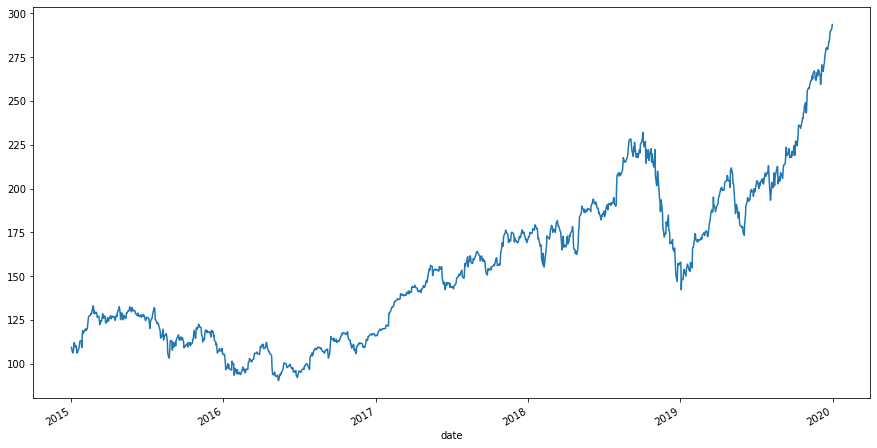

In [68]:
Apple.index = Apple['date']
Apple['close'].plot(figsize = (15,8))
plt.show()

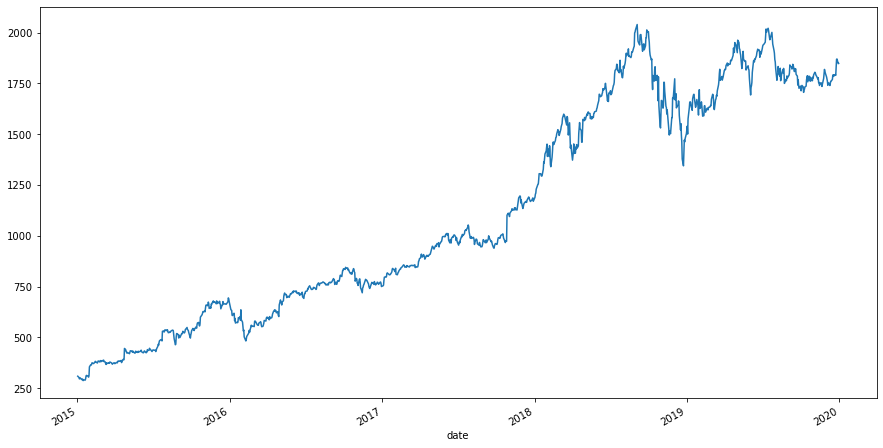

In [69]:
Amazon.index = Amazon['date']
Amazon['close'].plot(figsize = (15,8))
plt.show()

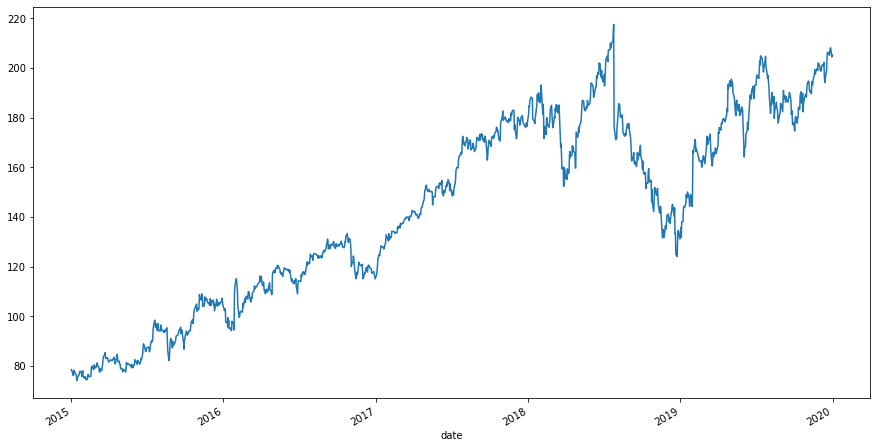

In [70]:
Facebook.index = Facebook['date']
Facebook['close'].plot(figsize = (15,8))
plt.show()

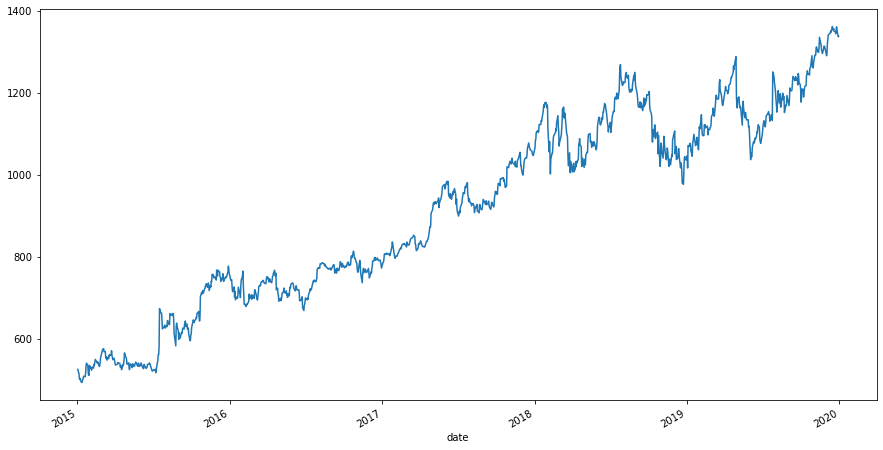

In [71]:
Google.index = Google['date']
Google['close'].plot(figsize = (15,8))
plt.show()

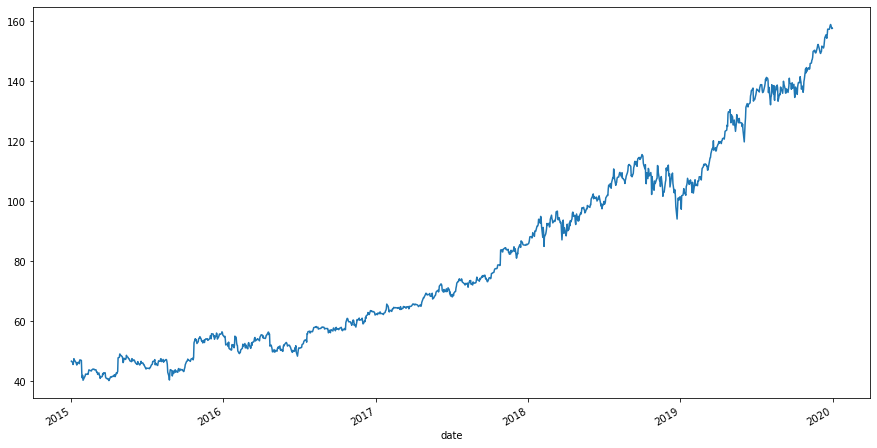

In [72]:
Microsoft.index = Microsoft['date']
Microsoft['close'].plot(figsize = (15,8))
plt.show()

#### QUE 2: Daily  percentage change of stocks

1. Daily percentage change in the price of the stock is calculated on the basis of percentage change between 2 consecutive days’ closing prices. Let’s say if the closing price of the stock yesterday was 500 and today the stock closed as 550. So, the percentage change is 10%. i.e. ((550–500) / 500)*100.
2. Accordingly, we’ll introduce a new column ‘Day_Perc_Change’ denoting the daily returns in the price of the stock. This can be done using in-built percentage change function pct_change().

In [83]:
def daily_percent_change(Company):
    # adding new column 'Daily_Percent_Change' to our dataframe 
    Company['Daily_Percent_Change'] = Company['close'].pct_change()*100 
     #First row value of daily percentage change is null as explained above it is calculated between two consecutive days.
    # So dropping 1st row
    Company.dropna(axis = 0, inplace = True)
    Company['Daily_Percent_Change'].plot(figsize = (12, 6), fontsize = 12) #plot 
    plt.xlabel('Year') # label for x axis
    plt.ylabel('Percent change') # label for y axis
    plt.show() 

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,date,Daily_Percent_Change
date,,,,,,,,,,
2019-12-30,1874.000000,1884.000000,1840.619995,1846.890015,1846.89,3677306,0.0000,1.0,2019-12-30,NaN
2019-12-27,1882.920044,1901.400024,1866.010010,1869.800049,1869.8,6188754,0.0000,1.0,2019-12-27,1.240468
2019-12-26,1801.010010,1870.459961,1799.500000,1868.770020,1868.77,6024608,0.0000,1.0,2019-12-26,-0.055087
2019-12-24,1793.810059,1795.569946,1787.579956,1789.209961,1789.21,881337,0.0000,1.0,2019-12-24,-4.257351
2019-12-23,1788.260010,1793.000000,1784.510010,1793.000000,1793.0,2137493,0.0000,1.0,2019-12-23,0.211823


In [96]:
Apple.head() # this is how daily percent change column looks like 

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,date,Daily_Percent_Change
date,,,,,,,,,,
2019-12-27,291.119995,293.970001,288.119995,289.799988,71.3887657398,36592936,0.0000,1.0,2019-12-27,-0.590008
2019-12-26,284.820007,289.980011,284.700012,289.910004,71.4158629248,23334004,0.0000,1.0,2019-12-26,0.037968
2019-12-24,284.690002,284.890015,282.920013,284.269989,70.0265163452,12119714,0.0000,1.0,2019-12-24,-1.945436
2019-12-23,280.529999,284.250000,280.369995,284.000000,69.9600050728,24677883,0.0000,1.0,2019-12-23,-0.094974
2019-12-20,282.230011,282.649994,278.559998,279.440002,68.8367035829,69032743,0.0000,1.0,2019-12-20,-1.605636


Creating another function for plotting histogram to get the frequency of percentage change.

In [85]:
def dpc_hist(Company):
    Company['Daily_Percent_Change'].hist(bins = 50, figsize = (10,5)) 
    plt.xlabel('Percentage change') # label for x axis
    plt.ylabel('Frequency') # label for y axis
    plt.show() 
    return(Company.Daily_Percent_Change.describe())  # describe function to get Statistics from histogram

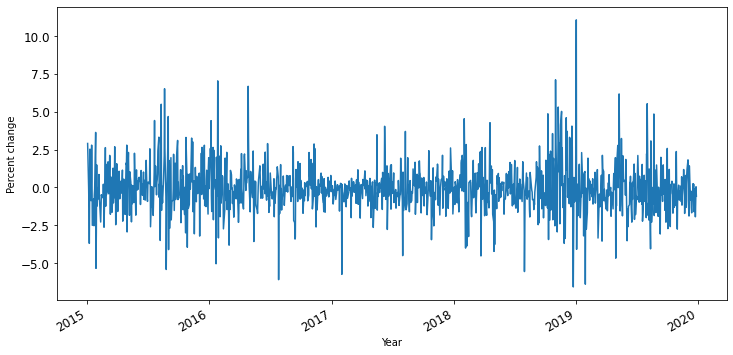

In [84]:
daily_percent_change(Apple)

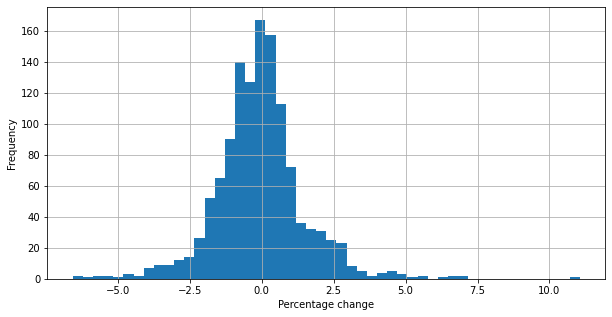

count    1256.000000
mean       -0.065738
std         1.573087
min        -6.578863
25%        -0.879797
50%        -0.080964
75%         0.596106
max        11.062658
Name: Daily_Percent_Change, dtype: float64

In [86]:
dpc_hist(Apple)

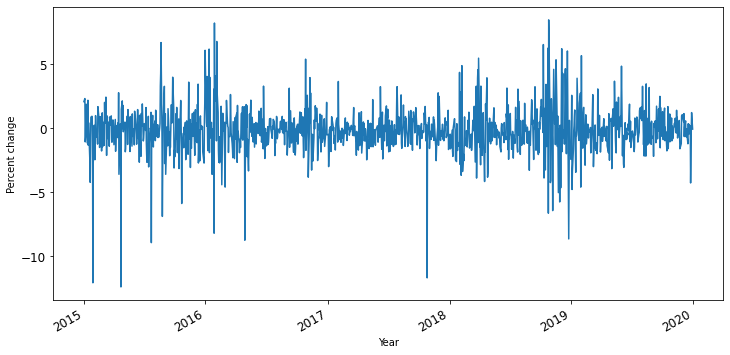

In [87]:
daily_percent_change(Amazon)

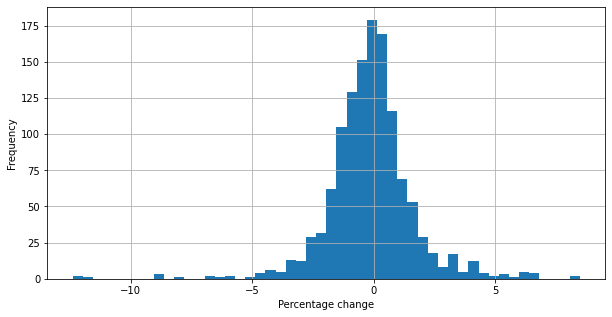

count    1257.000000
mean       -0.125743
std         1.812511
min       -12.381488
25%        -0.983709
50%        -0.130683
75%         0.659394
max         8.483028
Name: Daily_Percent_Change, dtype: float64

In [88]:
dpc_hist(Amazon)

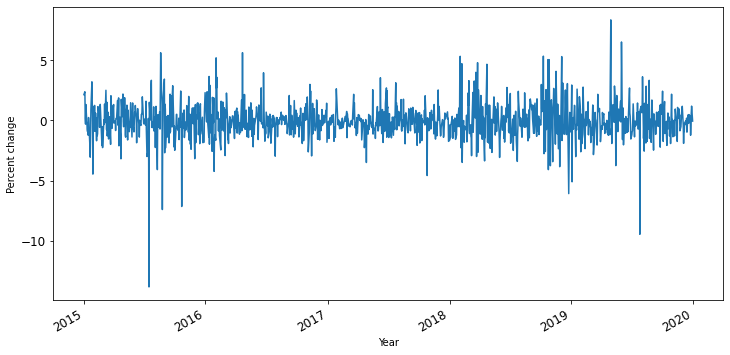

In [89]:
daily_percent_change(Google)

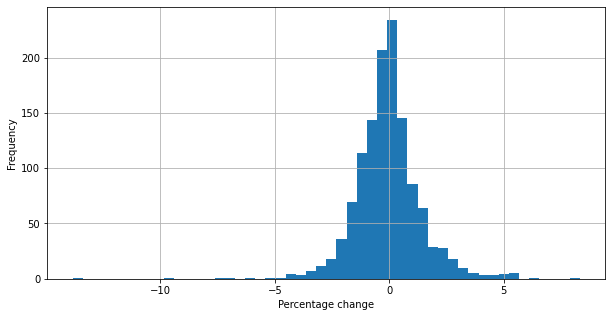

count    1257.000000
mean       -0.063148
std         1.493709
min       -13.832050
25%        -0.818908
50%        -0.062835
75%         0.606585
max         8.338380
Name: Daily_Percent_Change, dtype: float64

In [90]:
dpc_hist(Google)

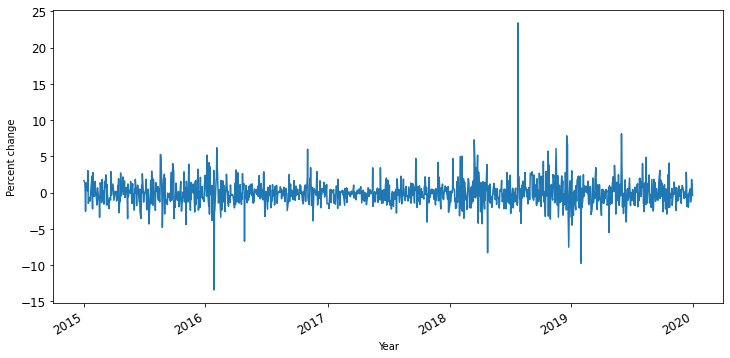

In [91]:
daily_percent_change(Facebook)

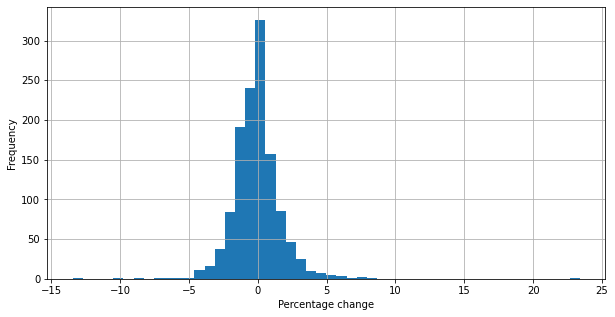

count    1257.000000
mean       -0.060414
std         1.806612
min       -13.435984
25%        -1.035100
50%        -0.095052
75%         0.659442
max        23.397255
Name: Daily_Percent_Change, dtype: float64

In [92]:
dpc_hist(Facebook)

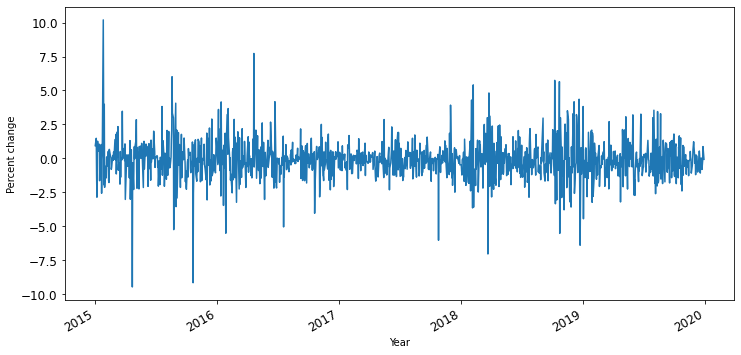

In [93]:
daily_percent_change(Microsoft)

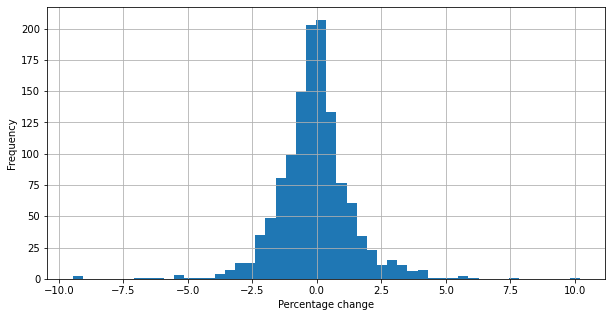

count    1257.000000
mean       -0.085926
std         1.465431
min        -9.463125
25%        -0.800884
50%        -0.084198
75%         0.555015
max        10.196900
Name: Daily_Percent_Change, dtype: float64

In [94]:
dpc_hist(Microsoft)

The daily returns histogram is centered about origin. For the past 5 years, the mean daily returns has been about  -0.085926 and for most of the days the daily return was less than 1% implying that the Microsoft stock has been less volatile over the period. During the period of 5 years, the highest % change in positive direction was observed to be 10.19% and was 9.46% in negative direction.

#### QUE 3: Trend Analysis

‘Trend’ values are based on the day-to-day percentage change we calculated above. Trend is determined from relationship of percentage change value and name associated with it. So defining a function 'trend' to assign the values of trends to percentage changes.

In [99]:
# using if and elif for different conditions/values of daily percent change of closing price
def trend(x):
    if x > -0.5 and x <= 0.5:
        return 'slight or no change'
    elif x > 0.5 and x <= 3:
        return 'positive trend'
    elif x > -3 and x <= -0.5:
        return 'negative trend'
    elif x > 3 and x <= 7:
        return 'among top gainers'
    elif x > -7 and x <= -3:
        return 'among top losers'
    elif x > 7:
        return 'Bull run'
    elif x <= -7:
        return 'Bear drop'

defining another function 'column_trend' to add new column in our company's dataframes for trend associated with percent change.

In [100]:
def column_trend(Company):
    Company['Trend']= np.zeros(Company['Daily_Percent_Change'].count()) # adding new column 'trend' to dataframe with zero as value 
    Company['Trend']= Company['Daily_Percent_Change'].apply(lambda x:trend(x)) #using lambda function to assign trend associated with values in daily percent change column

In [106]:
column_trend(Apple) #using column_trend function to get neew column 'trend' in dataframe

In [111]:
Amazon.dropna(axis = 0, inplace = True) #1st row is still null so dropping it 

In [112]:
column_trend(Amazon)  #using column_trend function to get neew column 'trend' in dataframe

In [103]:
column_trend(Google)  #using column_trend function to get neew column 'trend' in dataframe

In [104]:
column_trend(Facebook)  #using column_trend function to get neew column 'trend' in dataframe

In [105]:
column_trend(Microsoft)  #using column_trend function to get neew column 'trend' in dataframe

In [113]:
Google #sanity check 

,open,high,low,close,adjusted close,volume,dividend amount,split coefficient,date,Daily_Percent_Change,Trend
date,,,,,,,,,,,
2019-12-30,1350.000000,1353.000000,1334.020020,1336.140015,1336.14,1051323,0.0000,1.0,2019-12-30,-0.065815,slight or no change
2019-12-27,1362.989990,1364.530029,1349.310059,1351.890015,1351.89,1038718,0.0000,1.0,2019-12-27,1.178765,positive trend
2019-12-26,1346.170044,1361.329956,1344.469971,1360.400024,1360.4,667754,0.0000,1.0,2019-12-26,0.629485,positive trend
2019-12-24,1348.500000,1350.260010,1342.780029,1343.560059,1343.56,347518,0.0000,1.0,2019-12-24,-1.237869,negative trend
2019-12-23,1355.869995,1359.800049,1346.510010,1348.839966,1348.84,883200,0.0000,1.0,2019-12-23,0.392973,slight or no change
...,...,...,...,...,...,...,...,...,...,...,...
2015-01-08,497.989990,503.480011,491.000000,502.679993,502.68,3344395,0.0000,1.0,2015-01-08,1.312041,positive trend
2015-01-07,507.000000,507.243988,499.649994,501.100006,501.1,2059366,0.0000,1.0,2015-01-07,-0.314313,slight or no change
2015-01-06,515.000000,516.174988,501.049988,501.959991,501.96,2891950,0.0000,1.0,2015-01-06,0.171614,slight or no change


Now dataframe has new required column 'trend'

To visualize these trends for companies, creating a function trend_pie.

In [115]:
def trend_pie(Company):
    Company_data = Company.groupby('Trend')  #define data
    Company_labels = sorted([i for i in Company.loc[:, 'Trend'].unique()]) # define label
    colors = sns.color_palette('pastel')[0:5] #define Seaborn color palette to use
    plt.pie(Company_data['Trend'].count(), labels = Company_labels, colors = colors, autopct='%0.1f%%',radius= 2) #pie chart
    plt.show()

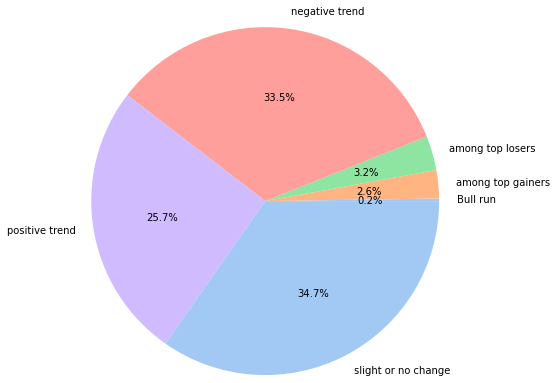

In [116]:
trend_pie(Apple)

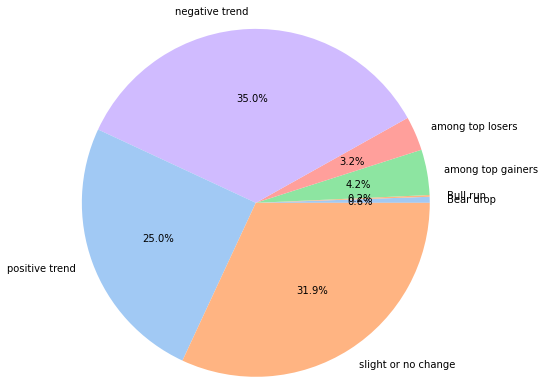

In [117]:
trend_pie(Amazon)

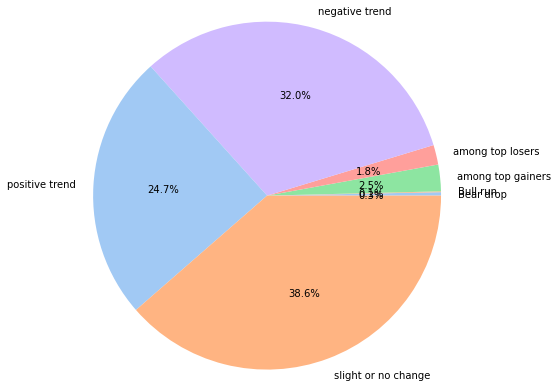

In [118]:
trend_pie(Google)

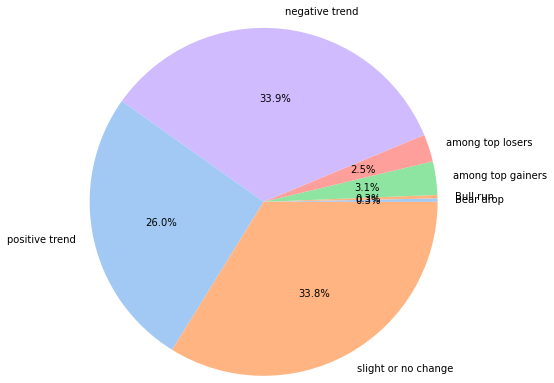

In [119]:
trend_pie(Facebook)

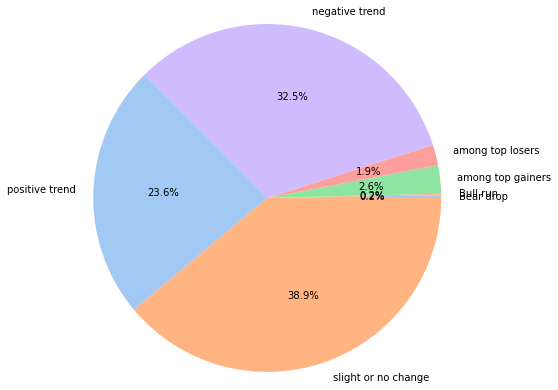

In [120]:
trend_pie(Microsoft)

#### Que 4:  Which stock is the most volatile stock?

A stock is said to have high volatility if its value can change dramatically within a short span of time. On other hand, lower volatility means that value of stock tends to be relatively steady over a period of time. Volatility is measured using ‘standard deviation’, which measures an asset’s departure from its average value. 

We have already calculated the daily returns of the stocks. Now we will calculate the 7-day rolling mean(also called moving average) of the daily returns, then compute the standard deviation (which is square root of the variance) and plot the values. Pandas ‘rolling’ function and ‘std’ function is used to get the values.

<AxesSubplot:xlabel='date'>

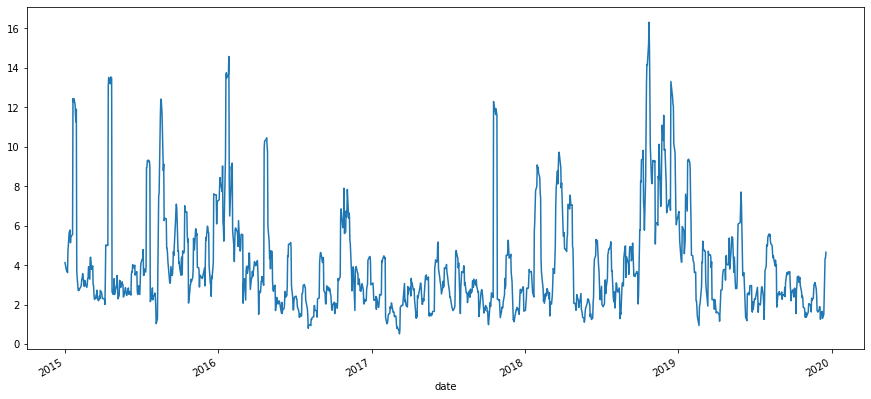

In [121]:
# using rolling and std functions to get volatility of amazon stock 
amazon_volatility = Amazon['Daily_Percent_Change'].rolling(7).std()*np.sqrt(7) 
amazon_volatility.plot(figsize = (15, 7)) # plotting the output

Many traders and investors seek out higher volatility investments in order to make higher profits. If a stock does not move, not only it has low volatility, but also it has low gain potential. On the other hand, a stock or other security with a very high volatility level can have tremendous profit potential, but the risk is equally high.

Now to compare the volatility between five companies, we will take daily percent change columns from all the five companies dataframes and create new dataframe with those values. 

In [126]:
data_daily_per_change = [Amazon['Daily_Percent_Change'], Apple['Daily_Percent_Change'],
                         Google['Daily_Percent_Change'], Facebook['Daily_Percent_Change'],
                         Microsoft['Daily_Percent_Change']] #taking out required column from different dataframes.
headers = ['Amazon','Apple','Google','Facebook','Microsoft'] #column names
 #concat 'Daily_Percent_Change' columns from five different company's dataframe
df_daily_per_change = pd.concat(data_daily_per_change, axis=1, keys=headers) 
df_daily_per_change = pd.DataFrame(df_daily_per_change) # creating dataframe of it 
df_daily_per_change #sanity check

,Amazon,Apple,Google,Facebook,Microsoft
date,,,,,
2015-01-02,2.094710,2.898824,2.128947,1.632333,0.939012
2015-01-05,2.336681,-0.009412,2.372694,1.365721,1.478636
2015-01-06,-1.048857,-1.382828,0.171614,0.000000,-1.254594
2015-01-07,-0.678951,-3.700060,-0.314313,-2.590346,-2.857745
2015-01-08,1.188827,-0.107133,1.312041,0.559568,0.847638
...,...,...,...,...,...
2019-12-23,0.211823,-0.094974,0.392973,0.516772,0.019062
2019-12-24,-4.257351,-1.945436,-1.237869,-1.284951,-0.813001
2019-12-26,-0.055087,0.037968,0.629485,-0.148976,-0.182444


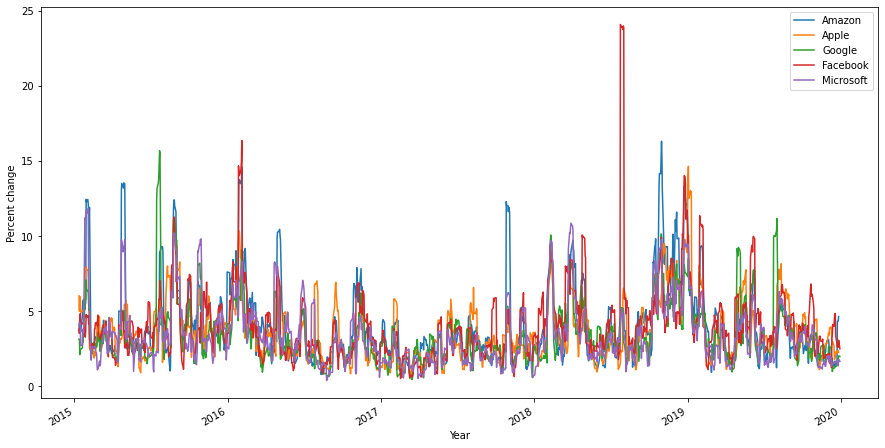

In [129]:
# using rolling and std functions to get volatility of different company's stock 
volatility = df_daily_per_change[['Amazon','Apple','Google','Facebook','Microsoft']].rolling(7).std()*np.sqrt(7)
volatility.plot(figsize = (15, 8)) #plot 
plt.xlabel('Year') # label for x axis
plt.ylabel('Percent change') # label for y axis
plt.show() 